<a href="https://colab.research.google.com/github/alimirgh75/ros/blob/main/03_04_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yelp Review Classifier
This notebook serves as a challenge to implement and explore LSTM and Convolution model over the new Yelp review dataset. You have to fill up all the blanks with the hyperparameters that helps you get the best accuracy and loss.

In [2]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.7.0


## Downloading the TensorFlow `yelp_popularity_review` dataset

> Make sure tensorflow_datasets is installed

In [3]:
##load the yelp reviews dataset
data, info = tfds.load("yelp_polarity_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/yelp_polarity_reviews/plain_text/0.1.0.incompleteK1EU1M/yelp_polarity_reviews-train.tfrecord


  0%|          | 0/560000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/yelp_polarity_reviews/plain_text/0.1.0.incompleteK1EU1M/yelp_polarity_reviews-test.tfrecord


  0%|          | 0/38000 [00:00<?, ? examples/s]

Dataset yelp_polarity_reviews downloaded and prepared to /root/tensorflow_datasets/yelp_polarity_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [4]:
train_data, test_data = data['train'], data['test']

train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [5]:
for sent, label in train_data:
    train_sentences.append(str(sent.numpy().decode('utf8')))
    train_labels.append(label.numpy())

for sent, label in test_data:
    test_sentences.append(str(sent.numpy().decode('utf8')))
    test_labels.append(label.numpy())


train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [6]:
##define the parameters for tokenizing and padding
vocab_size = 10000
embedding_dim = 32
max_length = 120
padding_type = 'post'
trunc_type='post'
oov_tok = "<OOV>"

In [7]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seqs,maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

## Explore the LSTM & CNN model with the following layers:
1. Embedding layer
2. Try two bidirectional LSTM layers or a Conv1D layer or both.
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation 

In [8]:
model_LTSM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_LTSM.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 32)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 120, 128)         49664     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 412,465
Trainable params: 412,465
Non-trai

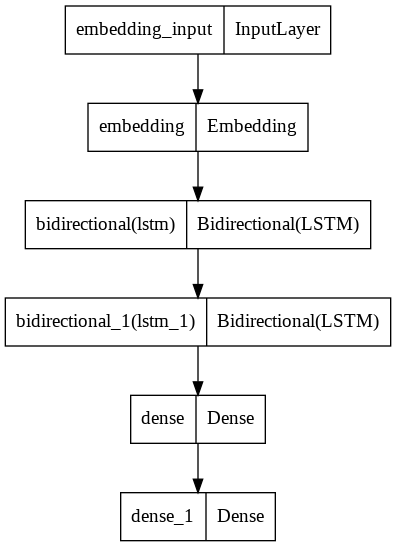

In [9]:
model_LTSM.summary()
tfk.utils.plot_model(model_LTSM)

In [10]:
model_Conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(64, 10, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_Conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 111, 64)           20544     
                                                                 
 flatten (Flatten)           (None, 7104)              0         
                                                                 
 dense_2 (Dense)             (None, 24)                170520    
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 511,089
Trainable params: 511,089
Non-trainable params: 0
_________________________________________________________________


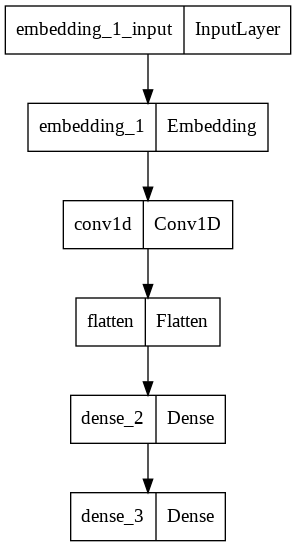

In [11]:
model_Conv.summary()
tfk.utils.plot_model(model_Conv)

In [29]:
model.summary()

NameError: ignored

In [30]:
num_epochs = 10
history = model_LTSM.fit(
    train_padded, 
    train_labels, 
    epochs=num_epochs, 
    validation_data=(test_padded, test_labels)
    )

Epoch 1/10
  425/17500 [..............................] - ETA: 34:34 - loss: 0.4198 - accuracy: 0.7946

KeyboardInterrupt: ignored

In [12]:
num_epochs = 10
history = model_Conv.fit(
    train_padded, 
    train_labels, 
    epochs=num_epochs, 
    validation_data=(test_padded, test_labels)
    )

Epoch 1/10
17500/17500 [==============================] - 430s 24ms/step - loss: 0.1957 - accuracy: 0.9201 - val_loss: 0.1470 - val_accuracy: 0.9433
Epoch 2/10
17500/17500 [==============================] - 442s 25ms/step - loss: 0.1449 - accuracy: 0.9434 - val_loss: 0.1469 - val_accuracy: 0.9434
Epoch 3/10
17500/17500 [==============================] - 442s 25ms/step - loss: 0.1174 - accuracy: 0.9549 - val_loss: 0.1513 - val_accuracy: 0.9424
Epoch 4/10
17500/17500 [==============================] - 449s 26ms/step - loss: 0.0910 - accuracy: 0.9658 - val_loss: 0.1694 - val_accuracy: 0.9424
Epoch 5/10
17500/17500 [==============================] - 430s 25ms/step - loss: 0.0685 - accuracy: 0.9742 - val_loss: 0.2008 - val_accuracy: 0.9351
Epoch 6/10
17500/17500 [==============================] - 422s 24ms/step - loss: 0.0516 - accuracy: 0.9810 - val_loss: 0.2252 - val_accuracy: 0.9346
Epoch 7/10
17500/17500 [==============================] - 420s 24ms/step - loss: 0.0399 - accuracy: 0.9853

## Visualise the accuracy and loss

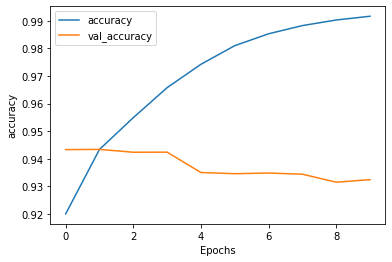

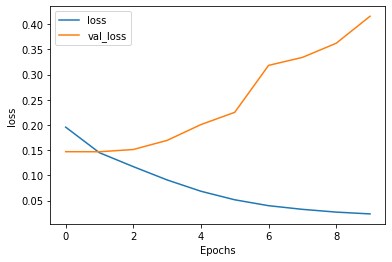

In [13]:
import matplotlib.pyplot as plt


def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
  
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

## Classify new reviews

In [15]:
sentence = ["the restaurant served a delicious pasta", "the restaurant didn't have a decent ambience"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model_Conv.predict(padded))

[[0.9721872 ]
 [0.00960395]]
